In [1]:
import numpy as np
import sklearn.model_selection as sk

import os
import pandas as pd
import qml
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/atomic_energies/')
import qml_interface as qmi
import scipy as sc
import itertools as it

from matplotlib import pyplot as plt

In [2]:
# data preparation
paths = qmi.wrapper_alch_data()
exclude='/home/misa/APDFT/prototyping/atomic_energies/results/slice_ve38/dsgdb9nsd_000829/atomic_energies_with_mic.txt'
paths.remove(exclude)
data, molecule_sizes = qmi.load_alchemy_data(paths)
labels = qmi.generate_label_vector(data, molecule_sizes.sum(), value='atomic')
charges = qmi.generate_label_vector(data, molecule_sizes.sum(), value='charge')
estpot = qmi.alchpot_lam1('pyscf')

In [3]:
idc_by_charge = qmi.partition_idx_by_charge(charges)

atomic_C = labels[idc_by_charge[6.0]]
estpot_C = estpot[idc_by_charge[6.0]]
reps = estpot_C.reshape((len(estpot_C), 1))
labels = atomic_C

In [4]:
def train_test_cycle(labels, lam, reps, sigma, tr_size):
    # split data in training and test
    reps_tr, reps_test, labels_tr, labels_test = sk.train_test_split(reps,labels,train_size=tr_size)

    # train
    coeffs = qmi.train_kernel(reps_tr, labels_tr, sigma, lam)
    # predict
    labels_predicted = qmi.predict_labels(reps_test, reps_tr, sigma, coeffs)
    #print(labels_predicted)
    mae = (np.abs(labels_predicted - labels_test)).mean()
    return(mae)

In [5]:
def crossvalidate(labels, lam, num_cv, reps, sigma, tr_size):
    error = []
    for cv in range(num_cv):
        error.append(train_test_cycle(labels, lam, reps, sigma, tr_size))
    error = np.array(error)
    return(error.mean(), error.std())

In [ ]:
sigmas = 1#np.logspace(-8, 5, base = 2)
lam_val = 1e-5
num_cv = 3
#sigmas = np.linspace()

In [ ]:
error_sigma = []
for s in sigmas:
    mae, std = crossvalidate(labels, lam_val, num_cv, reps, s, int(0.7*len(atomic_C)))
    error_sigma.append([s, mae, std])

In [ ]:
error_sigma = np.array(error_sigma)

In [ ]:
plt.plot(error_sigma[6:,0], error_sigma[6:,1])

In [ ]:
error_sigma[np.where(error_sigma[:,1] == np.amin(error_sigma[:,1]))]

In [ ]:
error_lambda = []
lam_vals = [1e-3, 1e-5, 1e-7, 1e-9]

for l in lam_vals:
    mae, std = crossvalidate(labels, l, num_cv, reps, 1.0, int(0.7*len(atomic_C)))
    error_lambda.append([l, mae, std])

In [ ]:
error_lambda

In [15]:
error = []
set_sizes = np.logspace(0, 12, base = 2)
sigma= 1
lam_val = 1e-7
num_cv = 10
#sigmas = np.l
for tr in set_sizes:
    mae, std = crossvalidate(labels, lam_val, num_cv, reps, sigma, int(tr))
    error.append([tr, mae, std])

In [16]:
error = np.array(error)

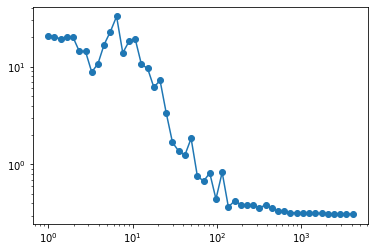

In [17]:
plt.plot(error[:,0], error[:,1], '-o')
plt.xscale('log')
plt.yscale('log')

In [18]:
error

array([[1.00000000e+00, 2.06824639e+01, 7.47015780e+00],
       [1.18500895e+00, 2.01524490e+01, 4.47295814e+00],
       [1.40424622e+00, 1.91996265e+01, 4.15512213e+00],
       [1.66404434e+00, 2.03272182e+01, 4.70226890e+00],
       [1.97190744e+00, 1.99251667e+01, 3.71236220e+00],
       [2.33672798e+00, 1.43228532e+01, 4.53522059e+00],
       [2.76904357e+00, 1.43030742e+01, 5.55329016e+00],
       [3.28134142e+00, 8.79258783e+00, 3.31195737e+00],
       [3.88841897e+00, 1.07017694e+01, 2.56418649e+00],
       [4.60781129e+00, 1.68353933e+01, 3.06809635e+01],
       [5.46029763e+00, 2.27954678e+01, 3.57668086e+01],
       [6.47050158e+00, 3.25906833e+01, 4.42790405e+01],
       [7.66760230e+00, 1.38246719e+01, 1.44261027e+01],
       [9.08617738e+00, 1.81103395e+01, 1.98572158e+01],
       [1.07672015e+01, 1.91455378e+01, 1.89591689e+01],
       [1.27592302e+01, 1.05511100e+01, 8.54619378e+00],
       [1.51198021e+01, 9.57856486e+00, 6.37160224e+00],
       [1.79171008e+01, 6.15288